# Trening modelu DL

In [19]:
import pandas as pd
import numpy as np

import os.path as path
import tensorflow.keras as keras
import matplotlib.pyplot as plt




## 1.0 wczytanie przygotowanych danych

In [20]:
#ścieżka do folderu, gdzie trzymamy zapisane pliki po preporcessingu danych 
rel_path = 'data'

x_train = np.load(path.join(rel_path,'x_train.npy'))
x_test = np.load(path.join(rel_path,'x_test.npy'))
y_train = np.load(path.join(rel_path,'y_train.npy'))
y_test = np.load(path.join(rel_path,'y_test.npy'))

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27455, 28, 28, 1)
(27455, 24)
(7172, 28, 28, 1)
(7172, 24)


In [22]:
input_shape = x_train.shape[1:]
out_shape = y_train.shape[1]
print(input_shape)
print(out_shape)

(28, 28, 1)
24


In [32]:
base_model = keras.Sequential()
base_model.add(keras.layers.Input(shape=(input_shape)))

base_model.add(keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'))
base_model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

base_model.add(keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
base_model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

base_model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'))
base_model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

## maxpool to nie to samo co użycie STRIDES w konwolucji - pamiętać!!

base_model.add(keras.layers.Flatten())  # this converts our 3D feature maps to 1D feature vectors


base_model.add(keras.layers.Dense(units=128,activation='relu'))
base_model.add(keras.layers.Dropout(0.55))

base_model.add(keras.layers.Dense(units=64,activation='relu'))
base_model.add(keras.layers.Dropout(0.55))

# base_model.add(keras.layers.Dense(units=32,activation='relu'))
# base_model.add(keras.layers.Dropout(0.5))



base_model.add(keras.layers.Dense(out_shape, activation='softmax'))



base_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

In [33]:
base_model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.Adam(learning_rate=0.001),
                   metrics=['accuracy'])

In [35]:
_batch_size = 128
_epochs = 80
_validation_split = 0.0

if _validation_split == 0.0:
    _val_data = (x_test,y_test)
else:
    _val_data = None

In [36]:
history = base_model.fit(x_train, y_train, epochs=_epochs, batch_size=_batch_size, validation_split = _validation_split, validation_data = _val_data )

# od biedy można sobie zapisać "co któryś model", żeby łatwo z niego skorzystać

Train on 27455 samples, validate on 7172 samples
Epoch 1/80
27455/27455 [==============================] - 4s 138us/sample - loss: 2.8989 - accuracy: 0.1188 - val_loss: 2.0698 - val_accuracy: 0.3892
Epoch 2/80
27455/27455 [==============================] - 3s 105us/sample - loss: 1.7959 - accuracy: 0.3911 - val_loss: 1.0103 - val_accuracy: 0.6941
Epoch 3/80
27455/27455 [==============================] - 3s 103us/sample - loss: 1.1407 - accuracy: 0.5993 - val_loss: 0.6109 - val_accuracy: 0.8123
Epoch 4/80
27455/27455 [==============================] - 3s 109us/sample - loss: 0.8288 - accuracy: 0.7061 - val_loss: 0.4484 - val_accuracy: 0.8721
Epoch 5/80
27455/27455 [==============================] - 3s 106us/sample - loss: 0.6429 - accuracy: 0.7717 - val_loss: 0.3529 - val_accuracy: 0.9031
Epoch 6/80
27455/27455 [==============================] - 3s 108us/sample - loss: 0.5446 - accuracy: 0.8049 - val_loss: 0.3413 - val_accuracy: 0.9024
Epoch 7/80
27455/27455 [===========================

Epoch 55/80
27455/27455 [==============================] - 3s 114us/sample - loss: 0.0780 - accuracy: 0.9741 - val_loss: 0.3106 - val_accuracy: 0.9646
Epoch 56/80
27455/27455 [==============================] - 3s 115us/sample - loss: 0.0804 - accuracy: 0.9729 - val_loss: 0.2827 - val_accuracy: 0.9579
Epoch 57/80
27455/27455 [==============================] - 3s 115us/sample - loss: 0.0821 - accuracy: 0.9726 - val_loss: 0.4221 - val_accuracy: 0.9626
Epoch 58/80
27455/27455 [==============================] - 3s 113us/sample - loss: 0.0799 - accuracy: 0.9727 - val_loss: 0.3644 - val_accuracy: 0.9573
Epoch 59/80
27455/27455 [==============================] - 3s 113us/sample - loss: 0.0809 - accuracy: 0.9727 - val_loss: 0.3518 - val_accuracy: 0.9635
Epoch 60/80
27455/27455 [==============================] - 3s 114us/sample - loss: 0.0741 - accuracy: 0.9755 - val_loss: 0.3435 - val_accuracy: 0.9650
Epoch 61/80
27455/27455 [==============================] - 3s 116us/sample - loss: 0.0733 - ac

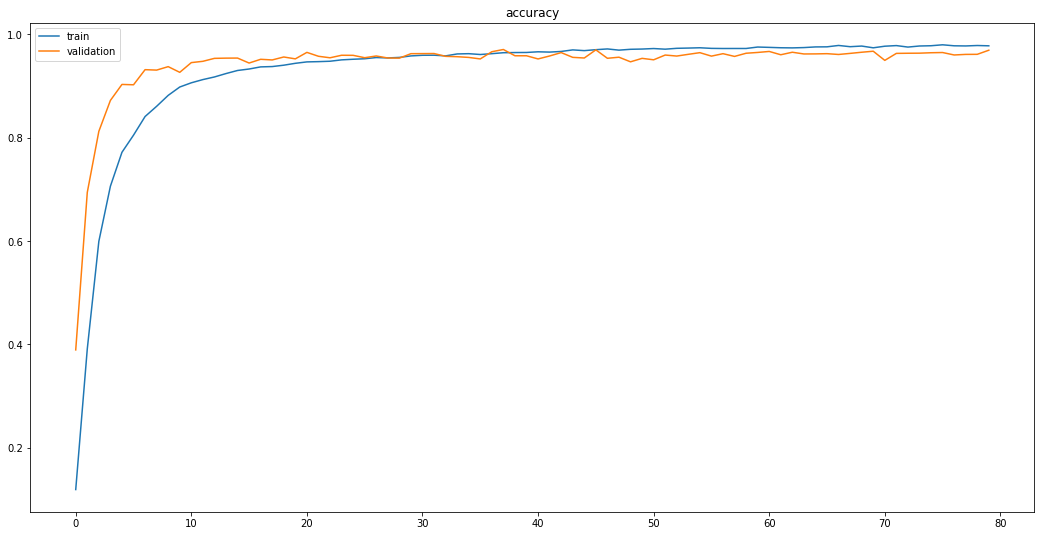

In [37]:
# rysowanie historii błędu
fig = plt.figure(figsize=(18,9))
#plt.plot(history.history['loss'])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(["train", "validation"])

plt.title('accuracy')
plt.show()


### hasło do sprawdzenia - batch normalization

In [38]:
results = base_model.evaluate(x_test, y_test, batch_size=len(x_test), verbose=0)
print("\n[!] Evaluation results:")
print("{0}: {2:.3f}, {1}: {3:.3f}".format(*base_model.metrics_names, *results))


[!] Evaluation results:
loss: 0.329, accuracy: 0.969


In [42]:
saved_file = 'trained_model.h5'
base_model.save(saved_file)

In [43]:
loaded_model = keras.models.load_model(saved_file)

In [44]:
results = loaded_model.evaluate(x_test, y_test, batch_size=len(x_test), verbose=0)
print("\n[!] Evaluation results:")
print("{0}: {2:.3f}, {1}: {3:.3f}".format(*base_model.metrics_names, *results))


[!] Evaluation results:
loss: 0.329, accuracy: 0.969
